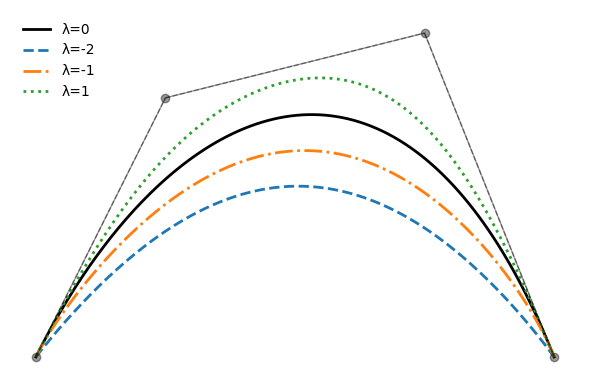

In [17]:
"""
Cubic Trigonometric Bézier (TB) curve demo
Author: @you
"""

import numpy as np
import matplotlib.pyplot as plt

# -------------------- 1. 基函数（矢量化） --------------------
def tb_basis(t: np.ndarray, lam: float):
    """
    返回 4×len(t) 的矩阵，每行对应 b0,b1,b2,b3
    t : 1-D array_like, t ∈ [0,1]
    lam : shape parameter λ ∈ [-2,1]
    """
    t = np.asarray(t, dtype=float)
    s = np.sin(np.pi / 2 * t)
    c = np.cos(np.pi / 2 * t)

    b0 = (1 - s) ** 2 * (1 - lam * s)
    b1 = s * (1 - s) * (2 + lam - lam * s)
    b2 = c * (1 - c) * (2 + lam - lam * c)
    b3 = (1 - c) ** 2 * (1 - lam * c)
    return np.stack([b0, b1, b2, b3], axis=0)  # shape (4, len(t))

# -------------------- 2. 曲线计算 --------------------
def tb_curve(P: np.ndarray, t: np.ndarray, lam: float):
    """
    P : (4,2) 控制点矩阵
    t : 1-D array 参数
    lam : shape parameter
    return : (len(t),2) 曲线点
    """
    B = tb_basis(t, lam)  # (4, len(t))
    return B.T @ P  # (len(t),2)

# -------------------- 3. 画图示例 --------------------
if __name__ == "__main__":
    # 给定 4 个控制点（可自行修改）
    P = np.array([(0, 0), (1, 2), (3, 2.5), (4, 0)])

    t = np.linspace(0, 1, 200)

    plt.figure(figsize=(6, 4))
    # 画普通三次 Bézier（λ=0 时退化为普通三次 Bézier）
    plt.plot(*tb_curve(P, t, 0).T, 'k-', lw=2, label='λ=0')

    # 画不同 λ 的 TB 曲线
    for lam, ls, lbl in [(-2, '--', 'λ=-2'),
                         (-1, '-.', 'λ=-1'),
                         ( 1, ':',  'λ=1')]:
        plt.plot(*tb_curve(P, t, lam).T, ls, lw=2, label=f'{lbl}')

    # 控制多边形
    plt.plot(*P.T, 'o-k', lw=1, alpha=0.4)
    for i in range(len(P) - 1):
        plt.plot(P[i:i + 2, 0], P[i:i + 2, 1], 'k--', lw=1, alpha=0.4)

    plt.gca().set_axis_off()  # ← 去掉坐标轴边框
    plt.legend(loc='upper left', frameon=False)  # ← 保留图例，但去掉图例边框
    plt.axis('equal')
    plt.tight_layout()

    # 保存为 PDF（矢量图，无白边）
    plt.savefig('fig01.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()
    

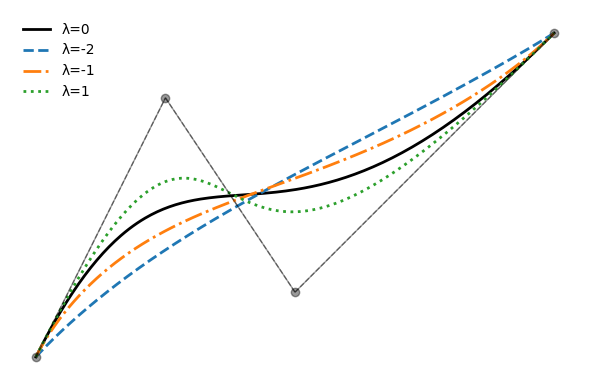

In [18]:
# -------------------- 3. 画图示例 --------------------
if __name__ == "__main__":
    # 给定 4 个控制点（可自行修改）
    P = np.array([(0, 0), (1, 2), (2, 0.5), (4, 2.5)])

    t = np.linspace(0, 1, 200)

    plt.figure(figsize=(6, 4))
    # 画普通三次 Bézier（λ=0 时退化为普通三次 Bézier）
    plt.plot(*tb_curve(P, t, 0).T, 'k-', lw=2, label='λ=0')

    # 画不同 λ 的 TB 曲线
    for lam, ls, lbl in [(-2, '--', 'λ=-2'),
                         (-1, '-.', 'λ=-1'),
                         ( 1, ':',  'λ=1')]:
        plt.plot(*tb_curve(P, t, lam).T, ls, lw=2, label=f'{lbl}')

    # 控制多边形
    plt.plot(*P.T, 'o-k', lw=1, alpha=0.4)
    for i in range(len(P) - 1):
        plt.plot(P[i:i + 2, 0], P[i:i + 2, 1], 'k--', lw=1, alpha=0.4)

    plt.gca().set_axis_off()  # ← 去掉坐标轴边框
    plt.legend(frameon=False)  # ← 保留图例，但去掉图例边框
    plt.axis('equal')
    plt.tight_layout()
    # 保存为 PDF（矢量图，无白边）
    plt.savefig('fig02.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()
    

C:\Users\18610\AppData\Local\Temp\ipykernel_12616\1138806766.py:114: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


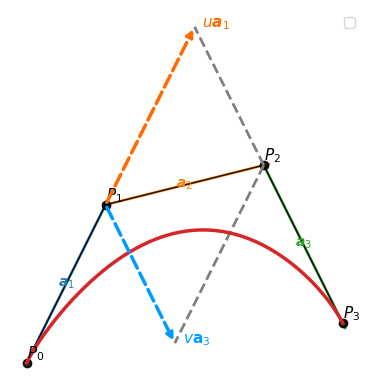

In [1]:
"""
P1 虚线带箭头；P2 虚线：向下平行 P1P0 与 va3 相交，向上平行 P3P2 与 ua1 相交
Author: @you
"""

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. 控制点 & 计算 a1,a2,a3
# -------------------------------------------------
P = np.array([(0, 0), (1, 2), (3, 2.5), (4, 0.5)], dtype=float)
P0, P1, P2, P3 = P
a1 = P1 - P0
a2 = P2 - P1
a3 = P3 - P2

# 反求 u,v
A = np.column_stack([a1, a3])
u, v = np.linalg.lstsq(A, a2, rcond=None)[0]

# -------------------------------------------------
# 2. TB 曲线（λ=-1）
# -------------------------------------------------
lam = -1.0
def tb_basis(t):
    s = np.sin(np.pi/2 * t)
    c = np.cos(np.pi/2 * t)
    b0 = (1 - s)**2 * (1 - lam*s)
    b2 = c*(1 - c)*(2 + lam - lam*c)
    b3 = (1 - c)**2 * (1 - lam*c)
    return b0, b2, b3

def r_curve(t):
    b0, b2, b3 = tb_basis(t)
    coef1 = 1 - b0 + u*(b2 + b3)
    coef3 = b3 + v*(b2 + b3)
    return P0 + coef1[:, None]*a1 + coef3[:, None]*a3

t = np.linspace(0, 1, 200)
curve = r_curve(t)

# -------------------------------------------------
# 3. 几何构造 P2 处两条虚线
# -------------------------------------------------
# 方向向量
dir_down = -a1          # 向下平行 P1P0
dir_up   = -a3          # 向上平行 P3P2

# 参数化相交计算（直线与直线交点）
def intersect(p1, d1, p2, d2):
    # solve  p1 + t*d1 = p2 + s*d2
    A = np.column_stack([d1, -d2])
    b = p2 - p1
    try:
        ts = np.linalg.solve(A, b)
        return p1 + ts[0]*d1
    except np.linalg.LinAlgError:
        return p1 + 2*d1   # 平行时退化为延长

# 交点
end_down = intersect(P2, dir_down, P1, v*a3)
end_up   = intersect(P2, dir_up,   P1, u*a1)

# -------------------------------------------------
# 4. 绘图
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 4))

# --- 控制多边形 ---
ax.plot(P[:, 0], P[:, 1], 'ko-', lw=1, alpha=0.9)
for i in range(4):
    ax.text(P[i, 0], P[i, 1], f'$P_{i}$', fontsize=11, ha='left', va='bottom')

# 在控制边中点标注a1,a2,a3
def mid(p,q): return (p+q)/2
ax.text(*mid(P0,P1), r'$\boldsymbol{a}_1$', color='C0', fontsize=10,
        ha='center', va='center')

ax.text(*mid(P1,P2), r'$\boldsymbol{a}_2$', color='C1', fontsize=10,
        ha='center', va='center')

ax.text(*mid(P2,P3), r'$\boldsymbol{a}_3$', color='C2', fontsize=10,
        ha='center', va='center')

# --- 向量箭头（a1,a2,a3） ---
kw = dict(width=0.015, head_width=0.08, head_length=0.08)
ax.arrow(*P0, *a1, **kw, fc='C0', ec='C0')
ax.arrow(*P1, *a2, **kw, fc='C1', ec='C1')
ax.arrow(*P2, *a3, **kw, fc='C2', ec='C2')

# --- P1 处虚线（带箭头）---
col_ua1 = '#FF6A00'
col_va3 = '#009BFF'
ax.annotate('', xy=P1 + u*a1, xytext=P1,
            arrowprops=dict(arrowstyle='->', color=col_ua1, lw=2.5, linestyle='--'))
ax.annotate('', xy=P1 + v*a3, xytext=P1,
            arrowprops=dict(arrowstyle='->', color=col_va3, lw=2.5, linestyle='--'))

# --- P2 处虚线（灰色，无箭头）---
col_p2 = 'gray'
ax.plot([P2[0], end_down[0]], [P2[1], end_down[1]], '--', color=col_p2, lw=2)
ax.plot([P2[0], end_up[0]],   [P2[1], end_up[1]],   '--', color=col_p2, lw=2)

# --- TB 曲线 ---
ax.plot(curve[:, 0], curve[:, 1], 'C3', lw=2.5)

# 标注
ax.text(P1[0] + u*a1[0] + 0.1, P1[1] + u*a1[1], '$u\\boldsymbol{a}_1$', color=col_ua1, fontsize=11)
ax.text(P1[0] + v*a3[0] + 0.1, P1[1] + v*a3[1], '$v\\mathbf{a}_3$', color=col_va3, fontsize=11)

ax.set_aspect('equal')
ax.set_axis_off()
ax.legend()
plt.tight_layout()
# 保存为 PDF（矢量图，无白边）
plt.savefig('fig10.pdf', bbox_inches='tight', pad_inches=0)
plt.show()


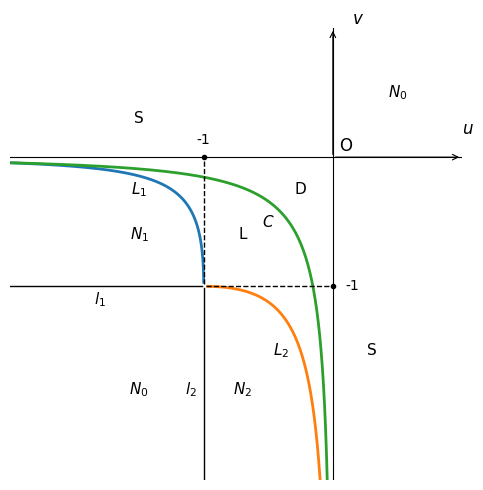

In [2]:
"""
Fig.1 (λ=0) 最终定稿：分段实/虚辅助线 + 全区域无框标注
Author: @you
"""
import numpy as np
import matplotlib.pyplot as plt

lam = 0.0

# --------------- 公式实现 ---------------
def L1(t):
    u = 0.5*(2 + 4*lam - (4 + 3*lam - lam*np.cos(np.pi*t))) / np.sin(np.pi/2*t)
    v = (lam*np.cos(np.pi/2*t) - 1) * np.tan(np.pi/4*t)**2
    return u, v

def L2(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = (1/cos)**2 * (1 - sin)**2 * (-1 + lam*sin)
    v = 1 + 2*lam - lam*cos - (2 + lam)/cos
    return u, v

def C(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = 0.5*(2 + 4*lam - (2 + lam)/sin - 3*lam*sin)
    v = (-2 - lam + 3*lam*cos) * (1/cos) * (np.sin(np.pi/4*t))**2
    return u, v

# --------------- 数据 ---------------
t = np.linspace(0.01, 0.99, 300)
u1, v1 = L1(t)
u2, v2 = L2(t)
uc, vc = C(t)

# --------------- 分段辅助线 ---------------
# l1: u=-1
v_seg = np.linspace(-2.5, 0, 100)
u_seg = -1 * np.ones_like(v_seg)
ax_l1_s = v_seg <= -1          # 实线部分
ax_l1_d = (v_seg > -1) & (v_seg <= 0)  # 虚线部分

# l2: v=-1
u_seg2 = np.linspace(-2.5, 0, 100)
v_seg2 = -1 * np.ones_like(u_seg2)
ax_l2_s = u_seg2 <= -1
ax_l2_d = (u_seg2 > -1) & (u_seg2 <= 0)

# --------------- 绘图 ---------------
fig, ax = plt.subplots(figsize=(6, 5))

# 曲线
ax.plot(u1, v1, 'C0', lw=2)
ax.plot(u2, v2, 'C1', lw=2)
ax.plot(uc, vc, 'C2', lw=2)

# l1 实线+虚线
ax.plot(u_seg[ax_l1_s], v_seg[ax_l1_s], 'k', lw=1)
ax.plot(u_seg[ax_l1_d], v_seg[ax_l1_d], 'k--', lw=1)

# l2 实线+虚线
ax.plot(u_seg2[ax_l2_s], v_seg2[ax_l2_s], 'k', lw=1)
ax.plot(u_seg2[ax_l2_d], v_seg2[ax_l2_d], 'k--', lw=1)

# 坐标轴
ax.axhline(0, color='black', lw=0.8)
ax.axvline(0, color='black', lw=0.8)
ax.text(0.05, 0.05, 'O', fontsize=12)
# u 轴（→）
ax.annotate('', xy=(1, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(1, 0.15, '$u$', fontsize=12, ha='left', va='bottom')

# v 轴（↑）
ax.annotate('', xy=(0, 1), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(0.15, 1, '$v$', fontsize=12, ha='left', va='bottom')


# 轴上-1标注
ax.plot(-1, 0, 'ko', markersize=3)
ax.plot(0, -1, 'ko', markersize=3)
ax.text(-1, 0.1, '-1', fontsize=10, ha='center')
ax.text(0.1, -1, '-1', fontsize=10, va='center')

# --------------- 无框区域标注 ---------------
ax.text(0.5,  0.5,  '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -1.8, '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.6, '$N_1$', fontsize=11, ha='center', va='center')
ax.text(-0.7, -1.8, '$N_2$', fontsize=11, ha='center', va='center')
ax.text(-1.5,  0.3,  'S',  fontsize=11, ha='center', va='center')
ax.text( 0.3, -1.5,  'S',  fontsize=11, ha='center', va='center')
ax.text(-0.7, -0.6, 'L',  fontsize=11, ha='center', va='center')
ax.text( -0.25,-0.25, 'D',  fontsize=11, ha='center', va='center')
ax.text(-0.5, -0.5, '$C$',  fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.25, '$L_1$',  fontsize=11, ha='center', va='center')
ax.text( -0.4,-1.5, '$L_2$',  fontsize=11, ha='center', va='center')


# 线旁标注
ax.text(-1.8, -1.1, '$l_1$', fontsize=11, ha='center', va='center')
ax.text(-1.1, -1.8, '$l_2$', fontsize=11, ha='center', va='center')

# --------------- 美化 ---------------
ax.set_xlim(-2.5, 1)
ax.set_ylim(-2.5, 1)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()
plt.savefig('fig1.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

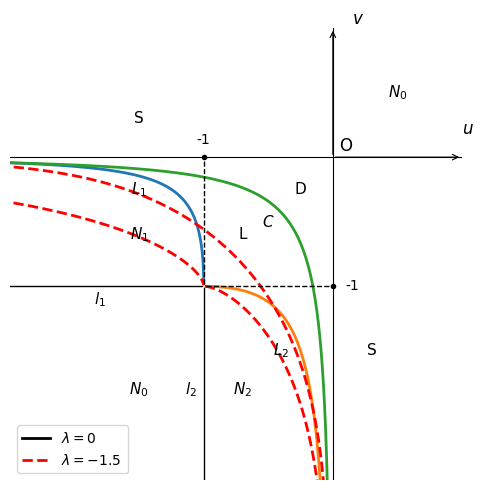

In [3]:
"""
Fig.1 (λ=0) 最终定稿：分段实/虚辅助线 + 全区域无框标注
Author: @you
"""
import numpy as np
import matplotlib.pyplot as plt

lam = 0.0

# --------------- 公式实现 ---------------
def L1(t):
    u = 0.5*(2 + 4*lam - (4 + 3*lam - lam*np.cos(np.pi*t))) / np.sin(np.pi/2*t)
    v = (lam*np.cos(np.pi/2*t) - 1) * np.tan(np.pi/4*t)**2
    return u, v

def L2(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = (1/cos)**2 * (1 - sin)**2 * (-1 + lam*sin)
    v = 1 + 2*lam - lam*cos - (2 + lam)/cos
    return u, v

def C(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = 0.5*(2 + 4*lam - (2 + lam)/sin - 3*lam*sin)
    v = (-2 - lam + 3*lam*cos) * (1/cos) * (np.sin(np.pi/4*t))**2
    return u, v

# --------------- 数据 ---------------
t = np.linspace(0.01, 0.99, 300)
u1, v1 = L1(t)
u2, v2 = L2(t)
uc, vc = C(t)

# --------------- λ = -0.5 红色虚线 ---------------
lam_red = -1.5

def L1_red(t):
    u = 0.5*(2 + 4*lam_red - (4 + 3*lam_red - lam_red*np.cos(np.pi*t))) / np.sin(np.pi/2*t)
    v = (lam_red*np.cos(np.pi/2*t) - 1) * np.tan(np.pi/4*t)**2
    return u, v

def L2_red(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = (1/cos)**2 * (1 - sin)**2 * (-1 + lam_red*sin)
    v = 1 + 2*lam_red - lam_red*cos - (2 + lam_red)/cos
    return u, v

def C_red(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = 0.5*(2 + 4*lam_red - (2 + lam_red)/sin - 3*lam_red*sin)
    v = (-2 - lam_red + 3*lam_red*cos) * (1/cos) * (np.sin(np.pi/4*t))**2
    return u, v

# 避开两端奇点
t_red = np.linspace(0.01, 0.99, 300)   # 关键：别用 0.01→0.99
u1r, v1r = L1_red(t_red)
u2r, v2r = L2_red(t_red)
ucr, vcr = C_red(t_red)



# --------------- 分段辅助线 ---------------
# l1: u=-1
v_seg = np.linspace(-2.5, 0, 100)
u_seg = -1 * np.ones_like(v_seg)
ax_l1_s = v_seg <= -1          # 实线部分
ax_l1_d = (v_seg > -1) & (v_seg <= 0)  # 虚线部分

# l2: v=-1
u_seg2 = np.linspace(-2.5, 0, 100)
v_seg2 = -1 * np.ones_like(u_seg2)
ax_l2_s = u_seg2 <= -1
ax_l2_d = (u_seg2 > -1) & (u_seg2 <= 0)

# --------------- 绘图 ---------------
fig, ax = plt.subplots(figsize=(6, 5))

# 曲线
ax.plot(u1, v1, 'C0', lw=2)
ax.plot(u2, v2, 'C1', lw=2)
ax.plot(uc, vc, 'C2', lw=2)

# 再画
ax.plot(u1r, v1r, 'r--', lw=2)
ax.plot(u2r, v2r, 'r--', lw=2)
ax.plot(ucr, vcr, 'r--', lw=2)

# l1 实线+虚线
ax.plot(u_seg[ax_l1_s], v_seg[ax_l1_s], 'k', lw=1)
ax.plot(u_seg[ax_l1_d], v_seg[ax_l1_d], 'k--', lw=1)

# l2 实线+虚线
ax.plot(u_seg2[ax_l2_s], v_seg2[ax_l2_s], 'k', lw=1)
ax.plot(u_seg2[ax_l2_d], v_seg2[ax_l2_d], 'k--', lw=1)

# 坐标轴
ax.axhline(0, color='black', lw=0.8)
ax.axvline(0, color='black', lw=0.8)
ax.text(0.05, 0.05, 'O', fontsize=12)
# u 轴（→）
ax.annotate('', xy=(1, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(1, 0.15, '$u$', fontsize=12, ha='left', va='bottom')

# v 轴（↑）
ax.annotate('', xy=(0, 1), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(0.15, 1, '$v$', fontsize=12, ha='left', va='bottom')


# 轴上-1标注
ax.plot(-1, 0, 'ko', markersize=3)
ax.plot(0, -1, 'ko', markersize=3)
ax.text(-1, 0.1, '-1', fontsize=10, ha='center')
ax.text(0.1, -1, '-1', fontsize=10, va='center')

# --------------- 无框区域标注 ---------------
ax.text(0.5,  0.5,  '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -1.8, '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.6, '$N_1$', fontsize=11, ha='center', va='center')
ax.text(-0.7, -1.8, '$N_2$', fontsize=11, ha='center', va='center')
ax.text(-1.5,  0.3,  'S',  fontsize=11, ha='center', va='center')
ax.text( 0.3, -1.5,  'S',  fontsize=11, ha='center', va='center')
ax.text(-0.7, -0.6, 'L',  fontsize=11, ha='center', va='center')
ax.text( -0.25,-0.25, 'D',  fontsize=11, ha='center', va='center')
ax.text(-0.5, -0.5, '$C$',  fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.25, '$L_1$',  fontsize=11, ha='center', va='center')
ax.text( -0.4,-1.5, '$L_2$',  fontsize=11, ha='center', va='center')


# 线旁标注
ax.text(-1.8, -1.1, '$l_1$', fontsize=11, ha='center', va='center')
ax.text(-1.1, -1.8, '$l_2$', fontsize=11, ha='center', va='center')

# --------------- 美化 ---------------
ax.set_xlim(-2.5, 1)
ax.set_ylim(-2.5, 1)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()

# --------------- 图例 ---------------
# 获取当前已画对象的“句柄”与“标签”
handles, labels = ax.get_legend_handles_labels()

# 手动补充 legend 项（黑色实线 λ=0 与红色虚线 λ=-0.5）
from matplotlib.lines import Line2D
black_line  = Line2D([], [], color='black', lw=2, label=r'$\lambda=0$ ')
red_dash    = Line2D([], [], color='red',   lw=2, linestyle='--', label=r'$\lambda=-1.5$ ')

# 合并并去重（避免重复）
handles.extend([black_line, red_dash])
labels.extend([black_line.get_label(), red_dash.get_label()])

ax.legend(handles=handles, loc='lower left', fontsize=10)
plt.savefig('fig2.pdf', bbox_inches='tight', pad_inches=0)
plt.show()




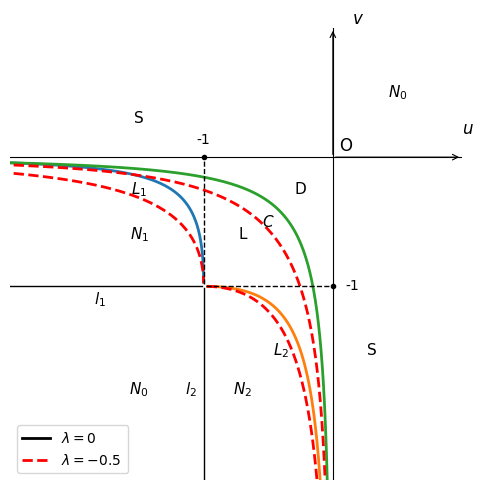

In [4]:
"""
Fig.1 (λ=0) 最终定稿：分段实/虚辅助线 + 全区域无框标注
Author: @you
"""
import numpy as np
import matplotlib.pyplot as plt

lam = 0.0

# --------------- 公式实现 ---------------
def L1(t):
    u = 0.5*(2 + 4*lam - (4 + 3*lam - lam*np.cos(np.pi*t))) / np.sin(np.pi/2*t)
    v = (lam*np.cos(np.pi/2*t) - 1) * np.tan(np.pi/4*t)**2
    return u, v

def L2(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = (1/cos)**2 * (1 - sin)**2 * (-1 + lam*sin)
    v = 1 + 2*lam - lam*cos - (2 + lam)/cos
    return u, v

def C(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = 0.5*(2 + 4*lam - (2 + lam)/sin - 3*lam*sin)
    v = (-2 - lam + 3*lam*cos) * (1/cos) * (np.sin(np.pi/4*t))**2
    return u, v

# --------------- 数据 ---------------
t = np.linspace(0.01, 0.99, 300)
u1, v1 = L1(t)
u2, v2 = L2(t)
uc, vc = C(t)

# --------------- λ = -0.5 红色虚线 ---------------
lam_red = -0.5

def L1_red(t):
    u = 0.5*(2 + 4*lam_red - (4 + 3*lam_red - lam_red*np.cos(np.pi*t))) / np.sin(np.pi/2*t)
    v = (lam_red*np.cos(np.pi/2*t) - 1) * np.tan(np.pi/4*t)**2
    return u, v

def L2_red(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = (1/cos)**2 * (1 - sin)**2 * (-1 + lam_red*sin)
    v = 1 + 2*lam_red - lam_red*cos - (2 + lam_red)/cos
    return u, v

def C_red(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = 0.5*(2 + 4*lam_red - (2 + lam_red)/sin - 3*lam_red*sin)
    v = (-2 - lam_red + 3*lam_red*cos) * (1/cos) * (np.sin(np.pi/4*t))**2
    return u, v

# 避开两端奇点
t_red = np.linspace(0.01, 0.99, 300)   # 关键：别用 0.01→0.99
u1r, v1r = L1_red(t_red)
u2r, v2r = L2_red(t_red)
ucr, vcr = C_red(t_red)



# --------------- 分段辅助线 ---------------
# l1: u=-1
v_seg = np.linspace(-2.5, 0, 100)
u_seg = -1 * np.ones_like(v_seg)
ax_l1_s = v_seg <= -1          # 实线部分
ax_l1_d = (v_seg > -1) & (v_seg <= 0)  # 虚线部分

# l2: v=-1
u_seg2 = np.linspace(-2.5, 0, 100)
v_seg2 = -1 * np.ones_like(u_seg2)
ax_l2_s = u_seg2 <= -1
ax_l2_d = (u_seg2 > -1) & (u_seg2 <= 0)

# --------------- 绘图 ---------------
fig, ax = plt.subplots(figsize=(6, 5))

# 曲线
ax.plot(u1, v1, 'C0', lw=2)
ax.plot(u2, v2, 'C1', lw=2)
ax.plot(uc, vc, 'C2', lw=2)

# 再画
ax.plot(u1r, v1r, 'r--', lw=2)
ax.plot(u2r, v2r, 'r--', lw=2)
ax.plot(ucr, vcr, 'r--', lw=2)

# l1 实线+虚线
ax.plot(u_seg[ax_l1_s], v_seg[ax_l1_s], 'k', lw=1)
ax.plot(u_seg[ax_l1_d], v_seg[ax_l1_d], 'k--', lw=1)

# l2 实线+虚线
ax.plot(u_seg2[ax_l2_s], v_seg2[ax_l2_s], 'k', lw=1)
ax.plot(u_seg2[ax_l2_d], v_seg2[ax_l2_d], 'k--', lw=1)

# 坐标轴
ax.axhline(0, color='black', lw=0.8)
ax.axvline(0, color='black', lw=0.8)
ax.text(0.05, 0.05, 'O', fontsize=12)
# u 轴（→）
ax.annotate('', xy=(1, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(1, 0.15, '$u$', fontsize=12, ha='left', va='bottom')

# v 轴（↑）
ax.annotate('', xy=(0, 1), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(0.15, 1, '$v$', fontsize=12, ha='left', va='bottom')


# 轴上-1标注
ax.plot(-1, 0, 'ko', markersize=3)
ax.plot(0, -1, 'ko', markersize=3)
ax.text(-1, 0.1, '-1', fontsize=10, ha='center')
ax.text(0.1, -1, '-1', fontsize=10, va='center')

# --------------- 无框区域标注 ---------------
ax.text(0.5,  0.5,  '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -1.8, '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.6, '$N_1$', fontsize=11, ha='center', va='center')
ax.text(-0.7, -1.8, '$N_2$', fontsize=11, ha='center', va='center')
ax.text(-1.5,  0.3,  'S',  fontsize=11, ha='center', va='center')
ax.text( 0.3, -1.5,  'S',  fontsize=11, ha='center', va='center')
ax.text(-0.7, -0.6, 'L',  fontsize=11, ha='center', va='center')
ax.text( -0.25,-0.25, 'D',  fontsize=11, ha='center', va='center')
ax.text(-0.5, -0.5, '$C$',  fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.25, '$L_1$',  fontsize=11, ha='center', va='center')
ax.text( -0.4,-1.5, '$L_2$',  fontsize=11, ha='center', va='center')


# 线旁标注
ax.text(-1.8, -1.1, '$l_1$', fontsize=11, ha='center', va='center')
ax.text(-1.1, -1.8, '$l_2$', fontsize=11, ha='center', va='center')

# --------------- 美化 ---------------
ax.set_xlim(-2.5, 1)
ax.set_ylim(-2.5, 1)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()

# --------------- 图例 ---------------
# 获取当前已画对象的“句柄”与“标签”
handles, labels = ax.get_legend_handles_labels()

# 手动补充 legend 项（黑色实线 λ=0 与红色虚线 λ=-0.5）
from matplotlib.lines import Line2D
black_line  = Line2D([], [], color='black', lw=2, label=r'$\lambda=0$ ')
red_dash    = Line2D([], [], color='red',   lw=2, linestyle='--', label=r'$\lambda=-0.5$ ')

# 合并并去重（避免重复）
handles.extend([black_line, red_dash])
labels.extend([black_line.get_label(), red_dash.get_label()])

ax.legend(handles=handles, loc='lower left', fontsize=10)
plt.savefig('fig3.pdf', bbox_inches='tight', pad_inches=0)
plt.show()




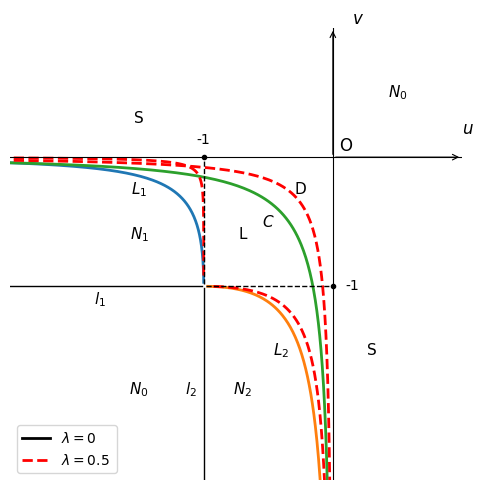

In [5]:
"""
Fig.1 (λ=0) 最终定稿：分段实/虚辅助线 + 全区域无框标注
Author: @you
"""
import numpy as np
import matplotlib.pyplot as plt

lam = 0.0

# --------------- 公式实现 ---------------
def L1(t):
    u = 0.5*(2 + 4*lam - (4 + 3*lam - lam*np.cos(np.pi*t))) / np.sin(np.pi/2*t)
    v = (lam*np.cos(np.pi/2*t) - 1) * np.tan(np.pi/4*t)**2
    return u, v

def L2(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = (1/cos)**2 * (1 - sin)**2 * (-1 + lam*sin)
    v = 1 + 2*lam - lam*cos - (2 + lam)/cos
    return u, v

def C(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = 0.5*(2 + 4*lam - (2 + lam)/sin - 3*lam*sin)
    v = (-2 - lam + 3*lam*cos) * (1/cos) * (np.sin(np.pi/4*t))**2
    return u, v

# --------------- 数据 ---------------
t = np.linspace(0.01, 0.99, 300)
u1, v1 = L1(t)
u2, v2 = L2(t)
uc, vc = C(t)

# --------------- λ = 0.5 红色虚线 ---------------
lam_red = 0.5

def L1_red(t):
    u = 0.5*(2 + 4*lam_red - (4 + 3*lam_red - lam_red*np.cos(np.pi*t))) / np.sin(np.pi/2*t)
    v = (lam_red*np.cos(np.pi/2*t) - 1) * np.tan(np.pi/4*t)**2
    return u, v

def L2_red(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = (1/cos)**2 * (1 - sin)**2 * (-1 + lam_red*sin)
    v = 1 + 2*lam_red - lam_red*cos - (2 + lam_red)/cos
    return u, v

def C_red(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = 0.5*(2 + 4*lam_red - (2 + lam_red)/sin - 3*lam_red*sin)
    v = (-2 - lam_red + 3*lam_red*cos) * (1/cos) * (np.sin(np.pi/4*t))**2
    return u, v

# 避开两端奇点
t_red = np.linspace(0.02, 0.98, 300)   # 关键：别用 0.01→0.99
u1r, v1r = L1_red(t_red)
u2r, v2r = L2_red(t_red)
ucr, vcr = C_red(t_red)



# --------------- 分段辅助线 ---------------
# l1: u=-1
v_seg = np.linspace(-2.5, 0, 100)
u_seg = -1 * np.ones_like(v_seg)
ax_l1_s = v_seg <= -1          # 实线部分
ax_l1_d = (v_seg > -1) & (v_seg <= 0)  # 虚线部分

# l2: v=-1
u_seg2 = np.linspace(-2.5, 0, 100)
v_seg2 = -1 * np.ones_like(u_seg2)
ax_l2_s = u_seg2 <= -1
ax_l2_d = (u_seg2 > -1) & (u_seg2 <= 0)

# --------------- 绘图 ---------------
fig, ax = plt.subplots(figsize=(6, 5))

# 曲线
ax.plot(u1, v1, 'C0', lw=2)
ax.plot(u2, v2, 'C1', lw=2)
ax.plot(uc, vc, 'C2', lw=2)

# 再画
ax.plot(u1r, v1r, 'r--', lw=2)
ax.plot(u2r, v2r, 'r--', lw=2)
ax.plot(ucr, vcr, 'r--', lw=2)

# l1 实线+虚线
ax.plot(u_seg[ax_l1_s], v_seg[ax_l1_s], 'k', lw=1)
ax.plot(u_seg[ax_l1_d], v_seg[ax_l1_d], 'k--', lw=1)

# l2 实线+虚线
ax.plot(u_seg2[ax_l2_s], v_seg2[ax_l2_s], 'k', lw=1)
ax.plot(u_seg2[ax_l2_d], v_seg2[ax_l2_d], 'k--', lw=1)

# 坐标轴
ax.axhline(0, color='black', lw=0.8)
ax.axvline(0, color='black', lw=0.8)
ax.text(0.05, 0.05, 'O', fontsize=12)
# u 轴（→）
ax.annotate('', xy=(1, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(1, 0.15, '$u$', fontsize=12, ha='left', va='bottom')

# v 轴（↑）
ax.annotate('', xy=(0, 1), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(0.15, 1, '$v$', fontsize=12, ha='left', va='bottom')


# 轴上-1标注
ax.plot(-1, 0, 'ko', markersize=3)
ax.plot(0, -1, 'ko', markersize=3)
ax.text(-1, 0.1, '-1', fontsize=10, ha='center')
ax.text(0.1, -1, '-1', fontsize=10, va='center')

# --------------- 无框区域标注 ---------------
ax.text(0.5,  0.5,  '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -1.8, '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.6, '$N_1$', fontsize=11, ha='center', va='center')
ax.text(-0.7, -1.8, '$N_2$', fontsize=11, ha='center', va='center')
ax.text(-1.5,  0.3,  'S',  fontsize=11, ha='center', va='center')
ax.text( 0.3, -1.5,  'S',  fontsize=11, ha='center', va='center')
ax.text(-0.7, -0.6, 'L',  fontsize=11, ha='center', va='center')
ax.text( -0.25,-0.25, 'D',  fontsize=11, ha='center', va='center')
ax.text(-0.5, -0.5, '$C$',  fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.25, '$L_1$',  fontsize=11, ha='center', va='center')
ax.text( -0.4,-1.5, '$L_2$',  fontsize=11, ha='center', va='center')


# 线旁标注
ax.text(-1.8, -1.1, '$l_1$', fontsize=11, ha='center', va='center')
ax.text(-1.1, -1.8, '$l_2$', fontsize=11, ha='center', va='center')

# --------------- 美化 ---------------
ax.set_xlim(-2.5, 1)
ax.set_ylim(-2.5, 1)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()

# --------------- 图例 ---------------
# 获取当前已画对象的“句柄”与“标签”
handles, labels = ax.get_legend_handles_labels()

# 手动补充 legend 项（黑色实线 λ=0 与红色虚线 λ=-0.5）
from matplotlib.lines import Line2D
black_line  = Line2D([], [], color='black', lw=2, label=r'$\lambda=0$ ')
red_dash    = Line2D([], [], color='red',   lw=2, linestyle='--', label=r'$\lambda=0.5$ ')

# 合并并去重（避免重复）
handles.extend([black_line, red_dash])
labels.extend([black_line.get_label(), red_dash.get_label()])

ax.legend(handles=handles, loc='lower left', fontsize=10)
plt.savefig('fig4.pdf', bbox_inches='tight', pad_inches=0)
plt.show()




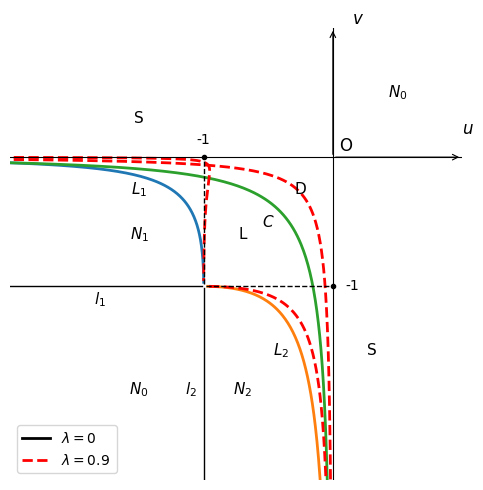

In [6]:
"""
Fig.1 (λ=0) 最终定稿：分段实/虚辅助线 + 全区域无框标注
Author: @you
"""
import numpy as np
import matplotlib.pyplot as plt

lam = 0.0

# --------------- 公式实现 ---------------
def L1(t):
    u = 0.5*(2 + 4*lam - (4 + 3*lam - lam*np.cos(np.pi*t))) / np.sin(np.pi/2*t)
    v = (lam*np.cos(np.pi/2*t) - 1) * np.tan(np.pi/4*t)**2
    return u, v

def L2(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = (1/cos)**2 * (1 - sin)**2 * (-1 + lam*sin)
    v = 1 + 2*lam - lam*cos - (2 + lam)/cos
    return u, v

def C(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = 0.5*(2 + 4*lam - (2 + lam)/sin - 3*lam*sin)
    v = (-2 - lam + 3*lam*cos) * (1/cos) * (np.sin(np.pi/4*t))**2
    return u, v

# --------------- 数据 ---------------
t = np.linspace(0.01, 0.99, 300)
u1, v1 = L1(t)
u2, v2 = L2(t)
uc, vc = C(t)

# --------------- λ = 0.9 红色虚线 ---------------
lam_red = 0.65

def L1_red(t):
    u = 0.5*(2 + 4*lam_red - (4 + 3*lam_red - lam_red*np.cos(np.pi*t))) / np.sin(np.pi/2*t)
    v = (lam_red*np.cos(np.pi/2*t) - 1) * np.tan(np.pi/4*t)**2
    return u, v

def L2_red(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = (1/cos)**2 * (1 - sin)**2 * (-1 + lam_red*sin)
    v = 1 + 2*lam_red - lam_red*cos - (2 + lam_red)/cos
    return u, v

def C_red(t):
    sin, cos = np.sin(np.pi/2*t), np.cos(np.pi/2*t)
    u = 0.5*(2 + 4*lam_red - (2 + lam_red)/sin - 3*lam_red*sin)
    v = (-2 - lam_red + 3*lam_red*cos) * (1/cos) * (np.sin(np.pi/4*t))**2
    return u, v

# 避开两端奇点
t_red = np.linspace(0.01, 0.99, 300)   # 关键：别用 0.01→0.99
u1r, v1r = L1_red(t_red)
u2r, v2r = L2_red(t_red)
ucr, vcr = C_red(t_red)



# --------------- 分段辅助线 ---------------
# l1: u=-1
v_seg = np.linspace(-2.5, 0, 100)
u_seg = -1 * np.ones_like(v_seg)
ax_l1_s = v_seg <= -1          # 实线部分
ax_l1_d = (v_seg > -1) & (v_seg <= 0)  # 虚线部分

# l2: v=-1
u_seg2 = np.linspace(-2.5, 0, 100)
v_seg2 = -1 * np.ones_like(u_seg2)
ax_l2_s = u_seg2 <= -1
ax_l2_d = (u_seg2 > -1) & (u_seg2 <= 0)

# --------------- 绘图 ---------------
fig, ax = plt.subplots(figsize=(6, 5))

# 曲线
ax.plot(u1, v1, 'C0', lw=2)
ax.plot(u2, v2, 'C1', lw=2)
ax.plot(uc, vc, 'C2', lw=2)

# 再画
ax.plot(u1r, v1r, 'r--', lw=2)
ax.plot(u2r, v2r, 'r--', lw=2)
ax.plot(ucr, vcr, 'r--', lw=2)

# l1 实线+虚线
ax.plot(u_seg[ax_l1_s], v_seg[ax_l1_s], 'k', lw=1)
ax.plot(u_seg[ax_l1_d], v_seg[ax_l1_d], 'k--', lw=1)

# l2 实线+虚线
ax.plot(u_seg2[ax_l2_s], v_seg2[ax_l2_s], 'k', lw=1)
ax.plot(u_seg2[ax_l2_d], v_seg2[ax_l2_d], 'k--', lw=1)

# 坐标轴
ax.axhline(0, color='black', lw=0.8)
ax.axvline(0, color='black', lw=0.8)
ax.text(0.05, 0.05, 'O', fontsize=12)
# u 轴（→）
ax.annotate('', xy=(1, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(1, 0.15, '$u$', fontsize=12, ha='left', va='bottom')

# v 轴（↑）
ax.annotate('', xy=(0, 1), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8))
ax.text(0.15, 1, '$v$', fontsize=12, ha='left', va='bottom')


# 轴上-1标注
ax.plot(-1, 0, 'ko', markersize=3)
ax.plot(0, -1, 'ko', markersize=3)
ax.text(-1, 0.1, '-1', fontsize=10, ha='center')
ax.text(0.1, -1, '-1', fontsize=10, va='center')

# --------------- 无框区域标注 ---------------
ax.text(0.5,  0.5,  '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -1.8, '$N_0$', fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.6, '$N_1$', fontsize=11, ha='center', va='center')
ax.text(-0.7, -1.8, '$N_2$', fontsize=11, ha='center', va='center')
ax.text(-1.5,  0.3,  'S',  fontsize=11, ha='center', va='center')
ax.text( 0.3, -1.5,  'S',  fontsize=11, ha='center', va='center')
ax.text(-0.7, -0.6, 'L',  fontsize=11, ha='center', va='center')
ax.text( -0.25,-0.25, 'D',  fontsize=11, ha='center', va='center')
ax.text(-0.5, -0.5, '$C$',  fontsize=11, ha='center', va='center')
ax.text(-1.5, -0.25, '$L_1$',  fontsize=11, ha='center', va='center')
ax.text( -0.4,-1.5, '$L_2$',  fontsize=11, ha='center', va='center')


# 线旁标注
ax.text(-1.8, -1.1, '$l_1$', fontsize=11, ha='center', va='center')
ax.text(-1.1, -1.8, '$l_2$', fontsize=11, ha='center', va='center')

# --------------- 美化 ---------------
ax.set_xlim(-2.5, 1)
ax.set_ylim(-2.5, 1)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()

# --------------- 图例 ---------------
# 获取当前已画对象的“句柄”与“标签”
handles, labels = ax.get_legend_handles_labels()

# 手动补充 legend 项（黑色实线 λ=0 与红色虚线 λ=-0.5）
from matplotlib.lines import Line2D
black_line  = Line2D([], [], color='black', lw=2, label=r'$\lambda=0$ ')
red_dash    = Line2D([], [], color='red',   lw=2, linestyle='--', label=r'$\lambda=0.9$ ')

# 合并并去重（避免重复）
handles.extend([black_line, red_dash])
labels.extend([black_line.get_label(), red_dash.get_label()])

ax.legend(handles=handles, loc='lower left', fontsize=10)
plt.savefig('fig5.pdf', bbox_inches='tight', pad_inches=0)
plt.show()


